<a href="https://colab.research.google.com/github/NikhilReddii/covid-19_prediction/blob/main/CourseRecommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pickle
import sys
from sys import exc_info
import ast

In [44]:
# Performing the clustering of the students

In [2]:
grades=pd.read_excel(r'Grades_new.xlsx')
grades

,StudentID,CourseID,Grade
0,1,1,10
1,1,84,3
2,1,67,3
3,1,50,1
4,1,95,3
...,...,...,...
700,63,51,6
701,63,172,1
702,63,85,5
703,63,85,1


In [3]:
usecols = ['StudentID', 'CourseId','Grade']
print('Shape of ratings dataset is: ',grades.shape, '\n')
print('Max values in dataset are \n',grades.max(), '\n')
print('Min values in dataset are \n',grades.min(), '\n') 

Shape of ratings dataset is:  (705, 3) 

Max values in dataset are 
 StudentID     63
CourseID     202
Grade         10
dtype: int64 

Min values in dataset are 
 StudentID    1
CourseID     1
Grade        1
dtype: int64 



In [4]:
grades = grades[grades['Grade'] >= 4.0]
print('Shape of ratings dataset is: ',grades.shape, '\n')
print('Max values in dataset are \n',grades.max(), '\n')
print('Min values in dataset are \n',grades.min(), '\n') 

Shape of ratings dataset is:  (501, 3) 

Max values in dataset are 
 StudentID     63
CourseID     202
Grade         10
dtype: int64 

Min values in dataset are 
 StudentID    1
CourseID     1
Grade        4
dtype: int64 



In [5]:
grades_list = np.unique(grades['CourseID'])[:202]
grades = grades.loc[grades['CourseID'].isin(grades_list)]
print('Shape of ratings dataset is: ',grades.shape, '\n')
print('Max values in dataset are \n',grades.max(), '\n')
print('Min values in dataset are \n',grades.min(), '\n') 

Shape of ratings dataset is:  (501, 3) 

Max values in dataset are 
 StudentID     63
CourseID     202
Grade         10
dtype: int64 

Min values in dataset are 
 StudentID    1
CourseID     1
Grade        4
dtype: int64 



In [7]:
students_list = np.unique(grades['StudentID'])[:63]
grades = grades.loc[grades['StudentID'].isin(students_list)]
print('Shape of ratings dataset is: ',grades.shape, '\n')
print('Max values in dataset are \n',grades.max(), '\n')
print('Min values in dataset are \n',grades.min(), '\n') 
print('Total Students: ', np.unique(grades['StudentID']).shape[0])
print('Total courses which are taken by students:', np.unique(grades['CourseID']).shape[0]) 

Shape of ratings dataset is:  (501, 3) 

Max values in dataset are 
 StudentID     63
CourseID     202
Grade         10
dtype: int64 

Min values in dataset are 
 StudentID    1
CourseID     1
Grade        4
dtype: int64 

Total Students:  63
Total courses which are taken by students: 188


In [8]:
students_fav_courses = grades.loc[:, ['StudentID', 'CourseID']]

In [9]:
students_fav_courses = grades.reset_index(drop = True)

In [10]:
students_fav_courses.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500
StudentID,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,6,6,6,7,...,57,57,57,57,57,57,58,58,58,58,58,58,58,58,59,59,59,59,59,60,60,60,60,60,60,60,60,60,60,60,61,61,61,61,61,62,63,63,63,63
CourseID,1,25,86,49,123,181,99,1,131,108,160,148,61,138,8,202,118,5,188,163,181,182,188,36,20,16,107,101,95,104,144,32,10,15,7,101,53,58,36,72,...,31,181,58,105,40,195,88,132,186,110,113,152,108,70,37,146,156,120,115,95,106,199,170,2,167,122,89,19,33,33,55,50,66,57,11,179,137,51,85,130
Grade,10,7,7,7,9,7,4,4,5,10,7,4,5,6,7,7,9,6,10,9,9,6,9,10,5,9,8,4,10,5,7,4,10,9,9,10,6,8,6,5,...,9,5,6,10,8,10,6,6,7,7,8,6,5,9,10,8,8,7,10,5,6,5,5,6,4,6,8,4,10,6,5,7,5,7,10,6,4,6,5,7


In [11]:
def CoursesListForStudents(stuents, students_data):
    # users = a list of users IDs
    # users_data = a dataframe of users favourite movies or users watched movies
    students_courses_list = []
    for student in students:
        students_courses_list.append(str(list(students_data[students_data['StudentID'] == student]['CourseID'])).split('[')[1].split(']')[0])
    return students_courses_list

In [12]:
students = np.unique(students_fav_courses['StudentID'])
print(students.shape) 

(63,)


In [13]:
students_courses_list =  CoursesListForStudents(students, students_fav_courses)
print('Courses list for', len(students_courses_list), ' students')
print('A list of first 10 students and courses: \n',students_courses_list[:10]) 

Courses list for 63  students
A list of first 10 students and courses: 
 ['1, 25, 86', '49, 123, 181, 99, 1, 131, 108, 160, 148', '61, 138, 8, 202, 118, 5, 188, 163', '181, 182, 188, 36, 20', '16, 107, 101, 95, 104', '144, 32, 10, 15, 7, 101, 53, 58, 36', '72, 71, 174, 113, 165, 16', '160, 26, 84, 136, 155, 75, 135', '123, 155, 182, 126, 36, 158, 92, 125, 21', '52, 90, 113, 51, 149, 33, 134, 165, 74, 105, 122']


In [14]:
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [15]:
sparseMatrix, feature_names = prepSparseMatrix(students_courses_list)

In [16]:
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = students, columns = feature_names)
df_sparseMatrix

,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,113,114,115,116,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,...,58,59,6,60,61,63,64,65,66,67,69,7,70,71,72,74,75,76,77,79,8,80,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,98,99
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
61,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
first_6_students_SM = students_fav_courses[students_fav_courses['StudentID'].isin(students[:6])].sort_values('StudentID')
first_6_students_SM.T

,0,1,2,3,4,5,6,7,8,9,10,11,18,17,16,19,14,13,12,15,20,21,22,23,24,29,28,27,25,26,37,30,31,32,33,34,35,36,38
StudentID,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,6,6,6
CourseID,1,25,86,49,123,181,99,1,131,108,160,148,188,5,118,163,8,138,61,202,181,182,188,36,20,104,95,101,16,107,58,144,32,10,15,7,101,53,36
Grade,10,7,7,7,9,7,4,4,5,10,7,4,10,6,9,9,7,6,5,7,9,6,9,10,5,5,10,4,9,8,8,7,4,10,9,9,10,6,6


In [18]:
df_sparseMatrix.loc[np.unique(first_6_students_SM['StudentID']), list(map(str, np.unique(first_6_students_SM['CourseID'])))]

,1,5,7,8,10,15,16,20,25,32,36,49,53,58,61,86,95,99,101,104,107,108,118,123,131,138,144,148,160,163,181,182,188,202
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

In [51]:
elbow_method = elbowMethod(sparseMatrix) 

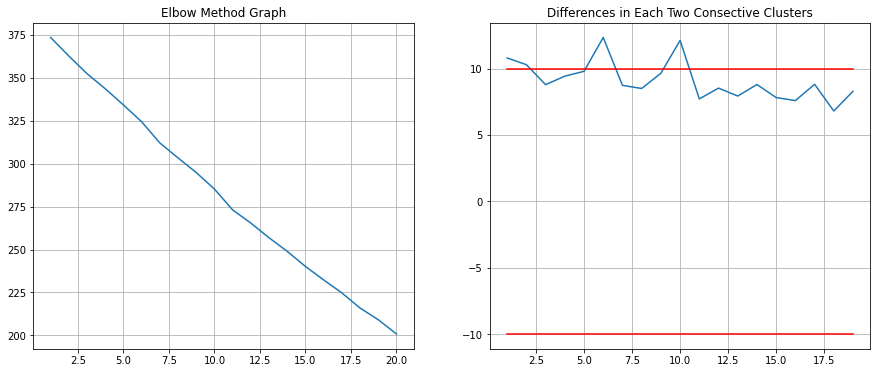

In [52]:
elbow_method.run(11, 30)
elbow_method.showPlot(boundary = 10)

In [28]:
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

In [29]:
students_cluster = pd.DataFrame(np.concatenate((students.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['StudentID', 'Cluster'])
students_cluster.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
StudentID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
Cluster,3,3,3,3,0,1,0,3,3,7,2,0,3,3,5,3,3,2,3,1,2,3,4,3,3,3,2,3,0,3,3,3,3,2,3,0,3,3,3,0,3,3,3,3,2,0,0,3,3,3,3,0,3,0,1,3,3,3,3,6,2,3,3


In [30]:
def clusterscourses(students_cluster, students_data):
    clusters = list(students_cluster['Cluster'])
    each_cluster_courses = list()
    for i in range(len(np.unique(clusters))):
        students_list = list(students_cluster[students_cluster['Cluster'] == i]['StudentID'])
        students_courses_list = list()
        for student in students_list:    
            students_courses_list.extend(list(students_data[students_data['StudentID'] == student]['StudentID']))
        students_courses_counts = list()
        students_courses_counts.extend([[course, students_courses_list.count(course)] for course in np.unique(students_courses_list)])
        each_cluster_courses.append(pd.DataFrame(students_courses_counts, columns=['CourseID', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_courses
cluster_courses = clusterscourses(students_cluster, students_fav_courses)

In [33]:
for i in range(8):
    len_users = students_cluster[students_cluster['Cluster'] == i].shape[0]
    print('Students in Cluster ' + str(i) + ' -> ', len_users) 

Students in Cluster 0 ->  10
Students in Cluster 1 ->  3
Students in Cluster 2 ->  7
Students in Cluster 3 ->  39
Students in Cluster 4 ->  1
Students in Cluster 5 ->  1
Students in Cluster 6 ->  1
Students in Cluster 7 ->  1


In [34]:
def getCoursesOfUser(student_id, students_data):
    return list(students_data[students_data['StudentID'] == student_id]['StudentID'])

In [35]:
def fixClusters(clusters_courses_dataframes, students_cluster_dataframe, students_data, smallest_cluster_size = 11):
    # clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
    # users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
    # smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove
    each_cluster_courses = clusters_courses_dataframes.copy()
    students_cluster = students_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_courses_list = [list(df['CourseID']) for df in each_cluster_courses]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    studentsInClusters = list()
    total_clusters = len(each_cluster_courses)
    for i in range(total_clusters):
        studentsInClusters.append(list(students_cluster[students_cluster['Cluster'] == i]['StudentID']))
    uncategorizedStudents = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(studentsInClusters[i]) < smallest_cluster_size:
            uncategorizedStudents.extend(studentsInClusters[i])
            studentsInClusters.pop(i)
            each_cluster_courses.pop(i)
            each_cluster_courses_list.pop(i)
            students_cluster.loc[students_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for student in uncategorizedStudents:
        elemProbability = list()
        student_courses = getCoursesOfUser(student, students_data)
        if len(student_courses) == 0:
            print(student)
        student_missed_courses = list()
        for courses_list in each_cluster_courses_list:
            count = 0
            missed_courses = list()
            for course in student_courses:
                if course in courses_list:
                    count += 1
                else:
                    missed_courses.append(course)
            elemProbability.append(count / len(student_courses))
            student_missed_courses.append(missed_courses)
        student_new_cluster = np.array(elemProbability).argmax()
        students_cluster.loc[students_cluster['StudentID'] == student, 'Cluster'] = student_new_cluster
        if len(student_missed_courses[student_new_cluster]) > 0:
            each_cluster_courses[student_new_cluster] = each_cluster_courses[student_new_cluster].append([{'CourseID': new_course, 'Count': 1} for new_course in student_missed_courses[student_new_cluster]], ignore_index = True)
    return each_cluster_courses, students_cluster

In [36]:
courses_df_fixed, clusters_fixed = fixClusters(cluster_courses, students_cluster, students_fav_courses, smallest_cluster_size = 6)

In [38]:
j = 0
for i in range(8):
    len_users = students_cluster[students_cluster['Cluster'] == i].shape[0]
    if len_users < 6:
        print('Students in Cluster ' + str(i) + ' -> ', len_users)
        j += 1
print('Total Cluster which we want to remove -> ', j) 

Students in Cluster 1 ->  3
Students in Cluster 4 ->  1
Students in Cluster 5 ->  1
Students in Cluster 6 ->  1
Students in Cluster 7 ->  1
Total Cluster which we want to remove ->  5


In [39]:
print('Length of total clusters before fixing is -> ', len(cluster_courses))
print('Max value in students_cluster dataframe column Cluster is -> ', students_cluster['Cluster'].max())
print('And dataframe is following')
students_cluster.T 

Length of total clusters before fixing is ->  8
Max value in students_cluster dataframe column Cluster is ->  7
And dataframe is following


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
StudentID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
Cluster,3,3,3,3,0,1,0,3,3,7,2,0,3,3,5,3,3,2,3,1,2,3,4,3,3,3,2,3,0,3,3,3,3,2,3,0,3,3,3,0,3,3,3,3,2,0,0,3,3,3,3,0,3,0,1,3,3,3,3,6,2,3,3


In [40]:
print('Length of total clusters after fixing is -> ', len(courses_df_fixed))
print('Max value in students_cluster dataframe column Cluster is -> ', clusters_fixed['Cluster'].max())
print('And fixed dataframe is following')
clusters_fixed.T 

Length of total clusters after fixing is ->  3
Max value in students_cluster dataframe column Cluster is ->  2
And fixed dataframe is following


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
StudentID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
Cluster,2,2,2,2,0,0,0,2,2,0,1,0,2,2,0,2,2,1,2,0,1,2,0,2,2,2,1,2,0,2,2,2,2,1,2,0,2,2,2,0,2,2,2,2,1,0,0,2,2,2,2,0,2,0,0,2,2,2,2,0,1,2,2


In [41]:
print('Size of courses dataframe after fixing -> ', len(courses_df_fixed)) 

Size of courses dataframe after fixing ->  3


In [46]:
print("Details of the number of students in each cluster")
for i in range(len(courses_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Students in Cluster ' + str(i) + ' -> ', len_users) 


Details of the number of students in each cluster
Students in Cluster 0 ->  17
Students in Cluster 1 ->  7
Students in Cluster 2 ->  39


In [47]:
print("Here it shows which student belong to which cluster")
clusters_fixed

Here it shows which student belong to which cluster


,StudentID,Cluster
0,1,2
1,2,2
2,3,2
3,4,2
4,5,0
...,...,...
58,59,2
59,60,0
60,61,1
61,62,2


In [48]:
# Apriori Algorithm

In [53]:
import os
import pandas as pd
from collections import defaultdict

In [57]:
data = pd.merge(grades, clusters_fixed , how='inner', on='StudentID')

In [189]:
#Grouping students data based on the cluster they belon to

In [184]:
grouped = data.groupby(data.Cluster)
studentC0 = grouped.get_group(0)
studentC1 = grouped.get_group(1)
studentC2 = grouped.get_group(2)

studentC0.reset_index(inplace = True, drop = True)
studentC1.reset_index(inplace = True, drop = True)
studentC2.reset_index(inplace = True, drop = True)

In [79]:
studentC2.reset_index(inplace = True, drop = True)

,StudentID,CourseID,Grade,Cluster
0,1,1,10,2
1,1,25,7,2
2,1,86,7,2
3,2,49,7,2
4,2,123,9,2
...,...,...,...,...
282,62,179,6,2
283,63,137,4,2
284,63,51,6,2
285,63,85,5,2


In [186]:
course_grades = data
course_grades.reset_index(inplace = True, drop = True)

In [187]:
course_grades["Popular"] =course_grades["Grade"] > 4


In [188]:
gradesn = course_grades.copy()

In [140]:
favorable_grades = gradesn[gradesn["Popular"]]

In [141]:
favorable_grades_by_users = dict((id, frozenset(vect.values)) for id, vect in favorable_grades.groupby("StudentID")["CourseID"])
favorable_grades_by_users

{1: frozenset({1, 25, 86}),
 2: frozenset({49, 108, 123, 131, 160, 181}),
 3: frozenset({5, 8, 61, 118, 138, 163, 188, 202}),
 4: frozenset({20, 36, 181, 182, 188}),
 5: frozenset({16, 95, 104, 107}),
 6: frozenset({7, 10, 15, 36, 53, 58, 101, 144}),
 7: frozenset({16, 71, 72, 113, 165, 174}),
 8: frozenset({84, 135, 136, 155, 160}),
 9: frozenset({21, 36, 92, 123, 125, 126, 155, 158, 182}),
 10: frozenset({33, 51, 52, 74, 90, 105, 113, 122, 134, 165}),
 11: frozenset({40, 111, 125, 128, 138}),
 12: frozenset({4, 69, 87, 104, 133, 146, 147, 151, 156}),
 13: frozenset({76, 79, 121, 186, 190, 200}),
 14: frozenset({35, 75, 96, 103, 132, 162}),
 15: frozenset({18, 22, 45, 87, 93, 159, 167, 177}),
 16: frozenset({65, 69, 90, 102, 116}),
 17: frozenset({82, 88, 137, 177, 189}),
 18: frozenset({11, 12, 19, 56, 57, 83, 118, 177}),
 19: frozenset({9, 19, 27, 51, 63, 65, 91, 143, 156}),
 20: frozenset({10, 65, 77, 127, 157, 179}),
 21: frozenset({26, 35, 65, 66, 69, 91, 143, 157, 191}),
 22: fr

In [149]:
num_favorable_by_course = gradesn[["CourseID","Popular"]].groupby("CourseID").sum()
num_favorable_by_course.sort_values(by="Popular", ascending=False).head()

,Popular
CourseID,
113,6
128,6
181,6
93,6
158,5


In [150]:
frequent_itemsets = {}

In [151]:
min_support=150

In [152]:
def find_frequent_itemsets(favorable_grades_by_users, itemsets, min_support):
    counts = defaultdict(int)
    for user, grades in favorable_grades_by_users.items():
        for itemset in itemsets:
            if itemset.issubset(grades):
                for other_course in grades - itemset:
                    new_superset = itemset | frozenset((other_course,))
                    counts[new_superset] += 1
    return dict([(itemset, frequency) for itemset, frequency in counts.items() if frequency >= min_support])

In [153]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 3

# Frequent Set will hold the frequent itemsets where index value indicates the size of the itemset

# Here we populate all Popular movies which havea favorable count which is greater than min_support required
frequent_itemsets[1] = dict((frozenset((course_id,)), row["Popular"])
                                for course_id, row in num_favorable_by_course.iterrows()
                                if row["Popular"] > min_support)

print("There are {} courses with more than {} good grades".format(len(frequent_itemsets[1]), min_support))
sys.stdout.flush()

There are 34 courses with more than 3 good grades


In [154]:
for k in range(2, 4):
    # Generate candidates of length k, using the frequent itemsets of length k-1
    # Only store the frequent itemsets
    cur_frequent_itemsets = find_frequent_itemsets(favorable_grades_by_users, frequent_itemsets[k-1],
                                                   min_support)
    if len(cur_frequent_itemsets) == 0:
        print("Did not find any frequent itemsets of length {}. Hence terminating...".format(k))
        sys.stdout.flush()
        break
    else:
        print("Found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets), k))
        sys.stdout.flush()
        frequent_itemsets[k] = cur_frequent_itemsets
# Not interested in the itemsets of length 1
del frequent_itemsets[1]

Found 15 frequent itemsets of length 2
Found 1 frequent itemsets of length 3


In [163]:
candidate_rules = []
for itemset_length, itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise, conclusion))
print("There are {} candidate rules".format(len(candidate_rules)))

There are 33 candidate rules


In [164]:
print(candidate_rules[:5])

[(frozenset({108}), 131), (frozenset({131}), 108), (frozenset({188}), 163), (frozenset({163}), 188), (frozenset({36}), 10)]


In [165]:
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)
for user, reviews in favorable_grades_by_users.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
# we maintain confidence of each rule in dictionary keyed by the rule
rule_confidence = {candidate_rule: correct_counts[candidate_rule] / float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
              for candidate_rule in candidate_rules}

In [166]:
# Choose only rules above a minimum confidence level
min_confidence = 0.01
# Filter out the rules with poor confidence
rule_confidence = {rule: confidence for rule, confidence in rule_confidence.items() if confidence > min_confidence}
print(len(rule_confidence))

33


In [167]:
from operator import itemgetter
sorted_confidence = sorted(rule_confidence.items(), key=itemgetter(1), reverse=True)

In [169]:
course_name_data=pd.read_excel(r'course_name_data.xlsx')
course_name_data

,CourseID,Title
0,1,Circuits and Electronics
1,2,Introduction to 2 and Programming
2,3,Introduction to Solid State Chemistry
3,4,Introduction to 2
4,5,Health in Numbers: Quantitative Methods in Cli...
...,...,...
196,198,First Nights: Symphonie Fantastique
197,199,Introduction to Family Engagement in Education
198,200,Introduction to Control System Design
199,201,Introduction to State Space Control


In [170]:
def get_course_name(course_id):
    title_object = course_name_data[course_name_data["CourseID"] == course_id]["Title"]
    title = title_object.values[0] # this will remove type information that accompanies a value
    return title

In [173]:
for index in range(2,10):
    print("Rule #{0}".format(index - 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_names = ", ".join(get_course_name(idx) for idx in premise)
    conclusion_name = get_course_name(conclusion)
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise_names, conclusion_name))
    print(" - Confidence: {0:.3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: If a person recommends Data Analysis for Genomics: Introduction to High-Dimensional Data Analysis they will also recommend First Nights: L'Orfeo
 - Confidence: 0.500

Rule #2
Rule: If a person recommends Introduction to Computational Thinking and Data Science they will also recommend The Ancient Greek Hero
 - Confidence: 0.500

Rule #3
Rule: If a person recommends The Ancient Greek Hero they will also recommend Introduction to Computational Thinking and Data Science
 - Confidence: 0.500

Rule #4
Rule: If a person recommends Circuits and Electronics: Applications they will also recommend Data Analysis for Genomics: Matrix Algebra and Linear Models
 - Confidence: 0.500

Rule #5
Rule: If a person recommends Circuits and Electronics: Applications they will also recommend Calculus: Integration
 - Confidence: 0.500

Rule #6
Rule: If a person recommends Calculus: Integration they will also recommend Circuits and Electronics: Applications
 - Confidence: 0.500

Rule #7
Rule: If a 

In [175]:
course_grades_test=pd.read_excel(r'course_grades.xlsx')
course_grades_test["Popular"] = course_grades_test["Grade"] > 3

In [176]:
test_dataset = course_grades_test.copy()
test_favorable = test_dataset[test_dataset["Popular"]]
test_favorable_by_students = dict((k, frozenset(v.values)) for k, v in test_favorable.groupby("StudentID")["CourseID"])
print(test_favorable_by_students)

{1: frozenset({1, 25, 86}), 2: frozenset({160, 1, 99, 131, 108, 49, 148, 181, 123}), 3: frozenset({163, 5, 8, 202, 138, 118, 188, 61}), 4: frozenset({36, 20, 181, 182, 188}), 5: frozenset({101, 104, 107, 16, 95}), 6: frozenset({32, 36, 101, 7, 10, 15, 144, 53, 58}), 7: frozenset({165, 71, 72, 174, 16, 113}), 8: frozenset({160, 135, 136, 75, 84, 26, 155}), 9: frozenset({36, 158, 155, 21, 182, 123, 92, 125, 126}), 10: frozenset({33, 165, 134, 122, 105, 74, 113, 51, 52, 149, 90}), 11: frozenset({128, 66, 40, 138, 111, 125}), 12: frozenset({4, 69, 133, 104, 146, 147, 87, 151, 156}), 13: frozenset({200, 186, 76, 79, 121, 90, 190}), 14: frozenset({96, 162, 35, 132, 197, 103, 75, 145}), 15: frozenset({167, 202, 45, 177, 18, 22, 87, 93, 159}), 16: frozenset({65, 69, 102, 41, 108, 116, 90}), 17: frozenset({137, 145, 177, 82, 88, 189}), 18: frozenset({11, 12, 177, 19, 83, 118, 56, 57}), 19: frozenset({65, 9, 91, 143, 19, 51, 27, 156, 63}), 20: frozenset({65, 10, 77, 142, 179, 157, 125, 127}), 21

In [178]:
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)
for user, reviews in test_favorable_by_students.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1


In [181]:
test_confidence = {candidate_rule:
                   (correct_counts[candidate_rule] / float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule]))
                   for candidate_rule in rule_confidence}
print(len(test_confidence))


33


In [183]:
for index in range(10):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_names = ", ".join(get_course_name(idx) for idx in premise)
    conclusion_name = get_course_name(conclusion)
    print("Rule: If a person recommends {0} they will also recommend {1}".format(premise_names, conclusion_name))
    print(" - Train Confidence: {0:.3f}".format(rule_confidence.get((premise, conclusion), -1)))
    print(" - Test Confidence: {0:.3f}".format(test_confidence.get((premise, conclusion), -1)))
    print("")

Rule #1
Rule: If a person recommends Circuits and Electronics: Basic Circuit Analysis they will also recommend Poetry in America: The Civil War and Its Aftermath
 - Train Confidence: 0.500
 - Test Confidence: 0.500

Rule #2
Rule: If a person recommends First Nights: L'Orfeo they will also recommend Data Analysis for Genomics: Introduction to High-Dimensional Data Analysis
 - Train Confidence: 0.500
 - Test Confidence: 0.500

Rule #3
Rule: If a person recommends Data Analysis for Genomics: Introduction to High-Dimensional Data Analysis they will also recommend First Nights: L'Orfeo
 - Train Confidence: 0.500
 - Test Confidence: 0.500

Rule #4
Rule: If a person recommends Introduction to Computational Thinking and Data Science they will also recommend The Ancient Greek Hero
 - Train Confidence: 0.500
 - Test Confidence: 0.500

Rule #5
Rule: If a person recommends The Ancient Greek Hero they will also recommend Introduction to Computational Thinking and Data Science
 - Train Confidence: 0